In [1]:
#Import the Libraries
import pandas as pd
import numpy as np

In [3]:
#Load the dataset
data=pd.read_csv('Startups_Data.csv')

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_16880/3313051633.py:2: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('Startups_Data.csv')


In [5]:
#Check the data
data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/changeagain-me,ChangeAgain.Me,http://changeagain.me,|User Experience Design|Sales and Marketing|,User Experience Design,"20,000",operating,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,/organization/le-herbÈ,Le HerbÈ,https://leherbe.com,|Medical Marijuana Patients|Organic Food|Produ...,Medical Marijuana Patients,"1,00,000",operating,USA,WA,Seattle,...,0,0,0,0,0,0,0,0,0,0
2,/organization/manifatto-ltd,Manifatto,http://manifatto.com,|E-Commerce|,E-Commerce,"30,000",operating,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,/organization/rdfy-inc-,"RDFY, Inc.",https://www.rdfy.me,|Retail Technology|,Retail Technology,-,operating,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0,0
4,/organization/kandid,Kandid,http://kandid.co,|Apps|,Apps,"14,00,000",operating,USA,CA,SF Bay Area,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#check the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49370 entries, 0 to 49369
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49370 non-null  object 
 1   name                  49369 non-null  object 
 2   homepage_url          45921 non-null  object 
 3   category_list         45421 non-null  object 
 4    market               45414 non-null  object 
 5    funding_total_usd    49370 non-null  object 
 6   status                48056 non-null  object 
 7   country_code          44101 non-null  object 
 8   state_code            30102 non-null  object 
 9   region                44101 non-null  object 
 10  city                  43258 non-null  object 
 11  funding_rounds        49370 non-null  int64  
 12  founded_at            38486 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [9]:
#We consider only the data related to startups in USA
usa_startups = data[data['country_code'] == 'USA']

In [11]:
#Drop irrelevant columns:
usa_startups = usa_startups.drop(columns=['homepage_url', 'permalink'])

In [13]:
#Check the empty values
print(usa_startups.isnull().sum())

name                       0
category_list           1750
 market                 1753
 funding_total_usd         0
status                   560
country_code               0
state_code                26
region                     0
city                      63
funding_rounds             0
founded_at              5097
founded_month           5100
founded_quarter         5100
founded_year            5100
first_funding_at           0
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_A                    0
round_B                    0
round_C                    0
round_D                    0
round_E                    0
round_F       

In [15]:
#Since status is the target variable, consider only the rows where it is not null
usa_startups = usa_startups[usa_startups['status'].notna()]

In [17]:
#Handle missing values for state and city
usa_startups['state_code'] = usa_startups['state_code'].replace('', np.nan)
usa_startups['city'] = usa_startups['city'].replace('', np.nan)

In [19]:
#Handle datetime formats
usa_startups['founded_at'] = pd.to_datetime(usa_startups['founded_at'], errors='coerce')
usa_startups['first_funding_at'] = pd.to_datetime(usa_startups['first_funding_at'], errors='coerce')
usa_startups['last_funding_at'] = pd.to_datetime(usa_startups['last_funding_at'], errors='coerce')

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_16880/4053234667.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  usa_startups['first_funding_at'] = pd.to_datetime(usa_startups['first_funding_at'], errors='coerce')
/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_16880/4053234667.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  usa_startups['last_funding_at'] = pd.to_datetime(usa_startups['last_funding_at'], errors='coerce')


In [21]:
#We consider a startup if the gao between the founded data and the first funding date is less than 4years
#For that calculate the gap_years as follows
# Calculate the gap in years (difference between 'founded_at' and 'first_funding_at')
usa_startups['gap_in_years'] = (usa_startups['first_funding_at'] - usa_startups['founded_at']).dt.days / 365

In [23]:
# Check the null values 
print(usa_startups.isnull().sum())

name                       0
category_list           1673
 market                 1676
 funding_total_usd         0
status                     0
country_code               0
state_code                24
region                     0
city                      61
funding_rounds             0
founded_at              4990
founded_month           4993
founded_quarter         4993
founded_year            4993
first_funding_at           1
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_A                    0
round_B                    0
round_C                    0
round_D                    0
round_E                    0
round_F       

In [25]:
#Apply the filter to consider the startups which has only 4 years of gao between founded date and the first_funding 
#This will also drop the rows where null values are present for the same
valid_gap = usa_startups[usa_startups['gap_in_years'] <= 4]

In [27]:
#Check the null values again
print(valid_gap.isnull().sum())

name                      0
category_list           665
 market                 667
 funding_total_usd        0
status                    0
country_code              0
state_code               13
region                    0
city                     32
funding_rounds            0
founded_at                0
founded_month             0
founded_quarter           0
founded_year              0
first_funding_at          0
last_funding_at           0
seed                      0
venture                   0
equity_crowdfunding       0
undisclosed               0
convertible_note          0
debt_financing            0
angel                     0
grant                     0
private_equity            0
post_ipo_equity           0
post_ipo_debt             0
secondary_market          0
product_crowdfunding      0
round_A                   0
round_B                   0
round_C                   0
round_D                   0
round_E                   0
round_F                   0
round_G             

In [29]:
# Drop the 'gap_in_years' column
valid_gap = valid_gap.drop('gap_in_years', axis=1)

In [31]:
#Check the column names to change if they are inconsistent
valid_gap.columns

Index(['name', 'category_list', ' market ', ' funding_total_usd ', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

In [33]:
#rename the following columns (removing the extra spaces)
valid_gap = valid_gap.rename(columns={' funding_total_usd ': 'funding_total_usd'})
valid_gap = valid_gap.rename(columns={' market ': 'market'})

In [35]:
#Check the data in year,quarter,month columns for each startup
valid_gap[['founded_at','founded_month','founded_quarter','founded_year']]

,founded_at,founded_month,founded_quarter,founded_year
1,2014-12-01,2014-12,2014-Q4,2014.0
3,2014-11-21,2014-11,2014-Q4,2014.0
4,2014-11-19,2014-11,2014-Q4,2014.0
5,2014-11-17,2014-11,2014-Q4,2014.0
7,2014-11-01,2014-11,2014-Q4,2014.0
...,...,...,...,...
38464,2012-01-01,1912-01,1912-Q1,1912.0
38465,2012-01-01,1912-01,1912-Q1,1912.0
38467,2011-01-01,1911-01,1911-Q1,1911.0
38468,2011-01-01,1911-01,1911-Q1,1911.0


In [37]:
#Modify the data in the columns, to address the inconsitencies 

In [39]:
#Replace the value of month by just the number, eliminating the year information

#Extract month from the founded_month column
valid_gap['month'] = valid_gap['founded_month'].str.split('-').str[-1]

# Extract month from the 'founded_at' column
valid_gap['founded_at_month'] = valid_gap['founded_at'].dt.month.astype(str)

#Compare and update the 'founded_month' column based on the condition
valid_gap['founded_month'] = valid_gap.apply(
    lambda row: row['month'] if row['founded_at_month'] == row['month'] 
    else row['founded_at_month'],
    axis=1
)

In [41]:
#The same thing is repeated for quarter column

#Extract the quarter number (Q1, Q2, Q3, Q4) from the 'founded_quarter' column
valid_gap['quarter'] = valid_gap['founded_quarter'].str[-1]

#Extract quarter from the 'founded_at' column
valid_gap['founded_at_quarter'] = valid_gap['founded_at'].dt.quarter.astype(str)

#Compare and update the 'founded_quarter' column based on the condition
valid_gap['founded_quarter'] = valid_gap.apply(
    lambda row: row['quarter'] if row['founded_at_quarter'] == row['quarter'] 
    else row['founded_at_quarter'],
    axis=1
)

In [43]:
#The same thing is repeated for year column

#Extract the year from founded_year column
valid_gap['year'] = valid_gap['founded_year'].astype(int)

#Extract year from the 'founded_at' column
valid_gap['founded_at_year'] = valid_gap['founded_at'].dt.year.astype(str)

#Compare and update the 'founded_year' column based on the condition
valid_gap['founded_year'] = valid_gap.apply(
    lambda row: row['year'] if row['founded_at_year'] == row['year'] 
    else row['founded_at_year'],
    axis=1
)

In [45]:
#Check the modified data
valid_gap[['founded_at','founded_month','founded_quarter','founded_year']]

,founded_at,founded_month,founded_quarter,founded_year
1,2014-12-01,12,4,2014
3,2014-11-21,11,4,2014
4,2014-11-19,11,4,2014
5,2014-11-17,11,4,2014
7,2014-11-01,11,4,2014
...,...,...,...,...
38464,2012-01-01,1,1,2012
38465,2012-01-01,1,1,2012
38467,2011-01-01,1,1,2011
38468,2011-01-01,1,1,2011


In [47]:
#drop the temporary columns created
valid_gap = valid_gap.drop(columns=['quarter', 'founded_at_quarter', 'month', 'founded_at_month', 'year', 'founded_at_year'])

In [49]:
#Check the formats for the columns
valid_gap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16743 entries, 1 to 38470
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  16743 non-null  object        
 1   category_list         16078 non-null  object        
 2   market                16076 non-null  object        
 3   funding_total_usd     16743 non-null  object        
 4   status                16743 non-null  object        
 5   country_code          16743 non-null  object        
 6   state_code            16730 non-null  object        
 7   region                16743 non-null  object        
 8   city                  16711 non-null  object        
 9   funding_rounds        16743 non-null  int64         
 10  founded_at            16743 non-null  datetime64[ns]
 11  founded_month         16743 non-null  object        
 12  founded_quarter       16743 non-null  object        
 13  founded_year         

In [51]:
# Convert founded_year,month and quarter to integer
valid_gap['founded_year'] = valid_gap['founded_year'].astype(int)
valid_gap['founded_month'] = valid_gap['founded_month'].astype(int)
valid_gap['founded_quarter'] = valid_gap['founded_quarter'].astype(int)

In [53]:
#Eliminate the non integer expressions from the funding_total_USD column
valid_gap['funding_total_usd'] = pd.to_numeric(
    valid_gap['funding_total_usd'].replace({',': '', ' ': ''}, regex=True),
    errors='coerce'
)

In [55]:
#Check the null values
print(valid_gap.isnull().sum())

name                       0
category_list            665
market                   667
funding_total_usd       2752
status                     0
country_code               0
state_code                13
region                     0
city                      32
funding_rounds             0
founded_at                 0
founded_month              0
founded_quarter            0
founded_year               0
first_funding_at           0
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_A                    0
round_B                    0
round_C                    0
round_D                    0
round_E                    0
round_F       

In [57]:
#Since all the other funding rounds,seed etc correspond to the total_funding received
#Lets try adding all the columns togethger and see how many columns still get 0 as the value

# Calculate the total funding for rows with NaN in 'total_funding_usd'
valid_gap['funding_total_usd'] = valid_gap['funding_total_usd'].fillna(
    valid_gap[['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
               'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
               'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 
               'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].sum(axis=1)
)

In [59]:
# Count the number of rows where 'funding_total_usd' is zero
zero_funding_count = valid_gap[valid_gap['funding_total_usd'] == 0].shape[0]
zero_funding_count

2752

In [61]:
#Drop all rows where funding is 0
#Remove rows where 'funding_total_usd' is zero
valid_gap = valid_gap[valid_gap['funding_total_usd'] != 0]

In [63]:
#Check the null values
print(valid_gap.isnull().sum())

name                      0
category_list           346
market                  348
funding_total_usd         0
status                    0
country_code              0
state_code                5
region                    0
city                     16
funding_rounds            0
founded_at                0
founded_month             0
founded_quarter           0
founded_year              0
first_funding_at          0
last_funding_at           0
seed                      0
venture                   0
equity_crowdfunding       0
undisclosed               0
convertible_note          0
debt_financing            0
angel                     0
grant                     0
private_equity            0
post_ipo_equity           0
post_ipo_debt             0
secondary_market          0
product_crowdfunding      0
round_A                   0
round_B                   0
round_C                   0
round_D                   0
round_E                   0
round_F                   0
round_G             

In [75]:
#Check how the data is given in market and category_list columns
valid_gap.loc[:,['name','category_list','market']]

,name,category_list,market
1,Le HerbÈ,|Medical Marijuana Patients|Organic Food|Produ...,Medical Marijuana Patients
4,Kandid,|Apps|,Apps
13,The Manly Man Can,|Fashion|,Fashion
17,MyKidsCalendar,|Software|,Software
18,The Viridan Group,|Hospitality|,Hospitality
...,...,...,...
38464,Northcentral Technical College,|Education|,Education
38465,Rice University,NaN,NaN
38467,EATON,|Automotive|Electrical Distribution|Hardware +...,Automotive
38468,"University of Tennessee, Health Sciences Center",NaN,NaN


In [67]:
#Handling market and category_list
#Check the market column and see if we can fill those two values from the category_lis:

# Check rows where 'category_list' is NaN and 'market' is not NaN
category_list_nan_market_not_nan = valid_gap[valid_gap['category_list'].isna() & valid_gap['market'].notna()]

# Check rows where 'market' is NaN and 'category_list' is not NaN
market_nan_category_list_not_nan = valid_gap[valid_gap['market'].isna() & valid_gap['category_list'].notna()]

In [69]:
category_list_nan_market_not_nan

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H


In [73]:
market_nan_category_list_not_nan.loc[:,['name','category_list','market']]

,name,category_list,market
4520,High Brew Coffee,|Consumer Goods|Coffee|Brewing|,NaN
4638,Klique,|Group Email|Group SMS|Social Media|,NaN


In [79]:
#Since we already have the information regarding the category, we can replace the information from category_list to market column
#Since there are only two columns, they are replaced manually 

In [81]:
#Check if the name is unique:
count_high_brew = valid_gap[valid_gap['name'] == 'High Brew Coffee'].shape[0]
count_high_brew

1

In [83]:
# Replace 'market' with 'Consumer Goods' where 'startup_name' is 'High Brew Coffee'
valid_gap.loc[valid_gap['name'] == 'High Brew Coffee', 'market'] = 'Consumer Goods'

In [85]:
#Check if the name is unique:
count_high_klique = valid_gap[valid_gap['name'] == 'Klique'].shape[0]
count_high_klique

1

In [87]:
# Replace 'market' with 'Social Media' where 'startup_name' is 'Klique'
valid_gap.loc[valid_gap['name'] == 'Klique', 'market'] = 'Social Media'

In [91]:
# Check rows for both 'High Brew Coffee' and 'Klique'
changed_startups = valid_gap[valid_gap['name'].isin(['High Brew Coffee', 'Klique'])]
changed_startups.loc[:,['name','category_list','market']]

,name,category_list,market
4520,High Brew Coffee,|Consumer Goods|Coffee|Brewing|,Consumer Goods
4638,Klique,|Group Email|Group SMS|Social Media|,Social Media


In [93]:
#Now that market has the same values as the category_list, we can drop that column
#Before dropping the category_list column, count the number of categories to which a startup belongs to

In [95]:
#Clean the 'category_list' by removing leading/trailing pipes and split into individual categories
#Split the 'category_list' column by '|' and remove any empty strings from the lists
valid_gap['category_list_split'] = valid_gap['category_list'].apply(
    lambda x: [i.strip() for i in x.split('|') if i.strip() != ''] if pd.notnull(x) else []
)

#Count the number of categories for each startup
valid_gap['category_count'] = valid_gap['category_list_split'].apply(len)

In [97]:
# Drop 'category_list' and 'category_list_split' columns
valid_gap = valid_gap.drop(columns=['category_list', 'category_list_split'], errors='ignore')

In [99]:
#Check the null values
print(valid_gap.isnull().sum())

name                      0
market                  346
funding_total_usd         0
status                    0
country_code              0
state_code                5
region                    0
city                     16
funding_rounds            0
founded_at                0
founded_month             0
founded_quarter           0
founded_year              0
first_funding_at          0
last_funding_at           0
seed                      0
venture                   0
equity_crowdfunding       0
undisclosed               0
convertible_note          0
debt_financing            0
angel                     0
grant                     0
private_equity            0
post_ipo_equity           0
post_ipo_debt             0
secondary_market          0
product_crowdfunding      0
round_A                   0
round_B                   0
round_C                   0
round_D                   0
round_E                   0
round_F                   0
round_G                   0
round_H             

In [101]:
# Drop rows where the 'market' column is null
valid_gap = valid_gap.dropna(subset=['market'])

In [103]:
#Check the null values
print(valid_gap.isnull().sum())

name                     0
market                   0
funding_total_usd        0
status                   0
country_code             0
state_code               5
region                   0
city                    16
funding_rounds           0
founded_at               0
founded_month            0
founded_quarter          0
founded_year             0
first_funding_at         0
last_funding_at          0
seed                     0
venture                  0
equity_crowdfunding      0
undisclosed              0
convertible_note         0
debt_financing           0
angel                    0
grant                    0
private_equity           0
post_ipo_equity          0
post_ipo_debt            0
secondary_market         0
product_crowdfunding     0
round_A                  0
round_B                  0
round_C                  0
round_D                  0
round_E                  0
round_F                  0
round_G                  0
round_H                  0
category_count           0
d

In [105]:
#When counting the number of categories a startup belongs to, the value can end up being zero for empty category_lists
# Count how many rows have '0' in the 'category_count' column
count_zeros = valid_gap[valid_gap['category_count'] == 0].shape[0]
print(f"Number of rows where 'category_count' is 0: {count_zeros}")

Number of rows where 'category_count' is 0: 0


In [110]:
#Format the startup name to remove any possible extensions(domain_name)
import re

# Step 1: Use regular expression to identify names that contain domain extensions like .com, .org, .net, etc.
domain_pattern = r'\.(com|org|net|io|co|gov|edu|us)$'  # Extend this list as needed

# Step 2: Apply this pattern to the 'name' column
valid_gap['has_domain'] = valid_gap['name'].apply(lambda x: bool(re.search(domain_pattern, str(x).lower())))

# Step 3: Display rows with domain extensions
domain_names = valid_gap[valid_gap['has_domain']]

# Display the rows that have domain extensions
print(domain_names[['name', 'has_domain']])

                           name  has_domain
33          Attractionfirst.com        True
312    MarijuanaStocksIndex.com        True
454                Neuroware.io        True
521                 Etology.com        True
545           eStartAcademy.com        True
...                         ...         ...
35681                Beyond.com        True
35777               Go2call.com        True
36344                 Tunes.com        True
36402                   Ask.com        True
38470             Since1910.com        True

[263 rows x 2 columns]


In [112]:
# Step 1: Remove the domain extension from the 'name' column
valid_gap['clean_name'] = valid_gap['name'].apply(lambda x: re.sub(domain_pattern, '', str(x).lower()).strip())

# Display the updated dataframe with cleaned names
print(valid_gap[['name', 'clean_name']].head())

                 name         clean_name
1            Le HerbÈ           le herbè
4              Kandid             kandid
13  The Manly Man Can  the manly man can
17     MyKidsCalendar     mykidscalendar
18  The Viridan Group  the viridan group


In [114]:
# Drop the temporary column
valid_gap = valid_gap.drop(columns=['has_domain'])

In [116]:
#Encoding the target variable
# Get unique values in the 'status' column
unique_status_values = valid_gap['status'].unique()

# Print the unique values
print(unique_status_values)

['operating' 'closed' 'acquired']


In [118]:
#For simplicity, both closed and acquired status is considered to be 0, while operating is considered to be 1
#Changing the status column to numerical value:
valid_gap['is_operating'] = valid_gap['status'].apply(lambda x: 1 if x == 'operating' else 0)

In [123]:
#Drop the status column
valid_gap = valid_gap.drop(columns=['status'])

In [125]:
#Further modification of 'market' column for easier encoding moving further

In [127]:
#Check the unique values for the market column
unique_market = valid_gap['market'].unique()

In [129]:
unique_market.shape

(623,)

In [131]:
#To reduce the number of unique values, these 623 unique values for market column are reduced to 10 broad categories

In [133]:
#Unique values for market column
unique_market

array([' Medical Marijuana Patients ', ' Apps ', ' Fashion ',
       ' Software ', ' Hospitality ', ' Health and Wellness ',
       ' Online Dating ', ' Games ', ' Security ', ' Online Gaming ',
       ' Medical ', ' Consulting ', ' Education ', ' Marketplaces ',
       ' Clean Technology ', ' Finance ', ' Fitness ', ' Agriculture ',
       ' Mobile ', ' Freelancers ', ' Chat ', ' Enterprises ',
       ' Entertainment ', ' Travel ', ' Analytics ', ' Manufacturing ',
       ' Real Estate ', ' mHealth ', ' E-Commerce ', ' Video ',
       ' Business Services ', ' Home Automation ', ' Retail ',
       ' Automotive ', ' Messaging ', ' Public Relations ',
       ' Health Care Information Technology ', ' Sales and Marketing ',
       ' Sports ', ' Developer APIs ', ' iPhone ', ' Mobile Commerce ',
       ' Consumer Goods ', ' Consumer Electronics ', ' Web Hosting ',
       ' Internet of Things ', ' Technology ', ' Big Data ',
       ' Investment Management ', ' User Experience Design ', ' Far

In [135]:
#Define the category mapping based on the above data
category_mapping = {
    'Healthcare': ['medical marijuana patients', 'health and wellness', 'medical', 'mhealth', 'health care information technology', 'health care', 'biotechnology', 'pharmaceuticals', 'medical devices', 'hospitals', 'dental', 'electronic health records', 'clinical trials', 'diagnostics', 'physicians', 'medical professionals', 'diabetes', 'senior health', 'health services industry', 'therapeutics', 'genetic testing', 'life sciences', 'personal health', 'cosmetic surgery', 'bioinformatics', 'health and insurance','nutrition','organic food','specialty foods'],

    'Technology': ['advertising platforms','app marketing','marketing automation','social media monitoring','internet marketing','apps', 'internet', 'software', 'telecommunications', 'security', 'consumer electronics', 'mobile', 'chat', 'technology', 'wireless', 'developer apis', 'it and cybersecurity', 'iphone', 'web hosting', 'web design', 'internet of things', 'big data', 'information technology', 'application platforms', 'android', 'app stores', 'virtualization', 'data visualization', 'open source', 'enterprise software', 'saas', 'file sharing', 'embedded hardware and software', 'data centers', 'hardware + software', 'augmented reality', 'computers', 'developer tools', 'databases', 'ios', 'electronics', 'ipad', 'hardware', 'computer vision', 'tablets', 'gps', 'google glass', 'cloud computing', '3d printing', '3d', '3d technology', 'web tools', 'robotics', 'virtual worlds', 'cloud security', 'graphics', 'sensors', 'audio', 'paas', 'voip', 'nfc', 'human computer interaction', 'mac', 'development platforms', 'high tech', 'ipod touch', 'google apps', 'kinect', 'algorithms', 'flash storage', 'rfid', 'windows phone 7', 'iaas', 'speech recognition', 'communications hardware', 'pc gaming', 'web cms', 'linux', 'semantic web', 'browser extensions', 'rim', 'webos', 'artificial intelligence', 'machine learning', 'cyber security', 'network security', 'data security', 'identity management', 'big data analytics', 'predictive analytics', 'text analytics', 'data mining', 'semantic search'],

    'Finance': ['real estate','manufacturing','industrial automation','real estate investors','commercial real estate','finance', 'financial services', 'investment management', 'bitcoin', 'billing', 'finance technology', 'venture capital', 'p2p money transfer', 'banking', 'stock exchanges', 'financial exchanges', 'credit', 'wealth management', 'credit cards', 'trading', 'hedge funds', 'crowdfunding', 'payments', 'mobile payments'],

    'Retail & E-Commerce': ['farmers market','groceries','restaurants','cooking','coffee','tea','wine and spirits','retail technology', 'e-commerce', 'marketplaces', 'mobile commerce', 'specialty retail', 'online shopping', 'shopping', 'wholesale', 'e-commerce platforms', 'consumer goods', 'retail'],

    'Media & Entertainment': ['advertising','public relations','brand marketing','performance marketing','social network media','social media platforms','communities','online dating','entertainment', 'film', 'video', 'social media', 'news', 'music services', 'digital media', 'photo sharing', 'video on demand', 'digital entertainment', 'video games', 'music', 'video streaming', 'television', 'social television', 'film production', 'concerts', 'celebrity', 'gaming', 'games', 'online gaming', 'mobile games', 'game', 'gamification', 'mmo games'],

    'Energy & Environment': ['agriculture','farming','animal feed','oil & gas', 'clean technology', 'renewable energies', 'energy it', 'clean energy', 'water', 'utilities', 'oil', 'green', 'solar', 'residential solar', 'energy efficiency', 'energy management', 'energy', 'sustainability', 'natural resources', 'gas', 'smart grid', 'wind', 'renewable tech', 'commercial solar', 'carbon', 'natural gas uses'],

    'Transport & Automotive': ['travel','tourism','adventure travel','social travel','hospitality','hotels','vacation rentals','automotive', 'transportation', 'aerospace', 'cars', 'public transportation', 'electric vehicles', 'taxis', 'logistics', 'shipping', 'fleet management'],

    'Education': ['career management','corporate training','education', 'k-12 education', 'universities', 'college campuses', 'technical continuing education', 'tutoring', 'teachers', 'colleges', 'educational games', 'language learning', 'charter schools', 'textbooks', 'high schools'],

    'Fashion & Lifestyle': ['weddings','pets','fashion', 'cosmetics', 'beauty', 'shoes', 'jewelry', 'lifestyle', 'lifestyle products', 'home decor', 'interior design', 'home & garden', 'home owners', 'home automation', 'home renovation', 'diy', 'fitness', 'sports', 'sporting goods', 'exercise'],

    'Business Services': ['freelancers','virtual workforces','employment','event management','social recruiting','consulting', 'business services', 'analytics', 'sales and marketing', 'business intelligence', 'small and medium businesses', 'b2b', 'customer service', 'enterprise resource planning', 'business productivity', 'business development', 'accounting', 'corporate training', 'corporate it', 'human resources', 'recruiting', 'project management', 'outsourcing', 'market research', 'supply chain management'],
}

In [137]:
#Define the mapping function
def map_category(segment):
    for category, keywords in category_mapping.items():
        if any(keyword in segment for keyword in keywords):
            return category
    return 'other'

In [139]:
#format the data in the dataset
valid_gap['market_segment']=valid_gap['market'].str.strip()
valid_gap['market_segment'] = valid_gap['market_segment'].str.lower()

In [141]:
#map the values as per the category_mapping
valid_gap['category_updated'] = valid_gap['market_segment'].apply(map_category)

In [143]:
#check the count values
valid_gap.category_updated.value_counts()

category_updated
Technology                4602
other                     2576
Healthcare                1842
Media & Entertainment     1709
Finance                    643
Retail & E-Commerce        638
Business Services          601
Transport & Automotive     339
Education                  311
Fashion & Lifestyle        294
Energy & Environment        90
Name: count, dtype: int64

In [152]:
#now drop the market_segment
#only retain the category_updated column (used for encoding)
valid_gap = valid_gap.drop(columns=['market_segment'])

In [157]:
#Before proceeding for the removal of outliers, filter the dataset based on the year

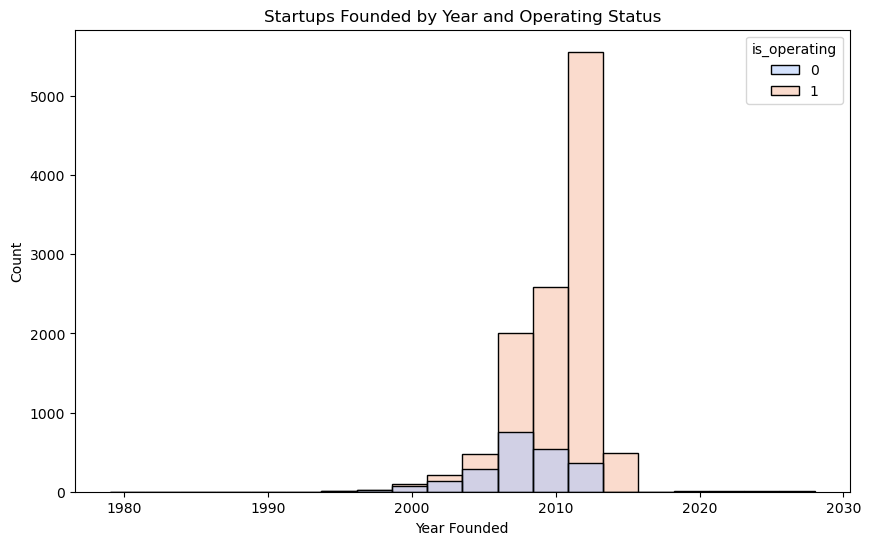

In [159]:
#Create a visualization of startups over the years to filter based on the year
import seaborn as sns
import matplotlib.pyplot as plt


# Trend by founded_year (without axes)
plt.figure(figsize=(10, 6))
sns.histplot(data=valid_gap, x='founded_year', hue='is_operating', kde=False, bins=20, palette='coolwarm')

# Adding titles and labels
plt.title('Startups Founded by Year and Operating Status')
plt.xlabel('Year Founded')
plt.ylabel('Count')

# Show the plot
plt.show()

In [161]:
#Since the data is collected only till 2014, any data displayed here after that might mislead for further prediction
#Hence we filter the dataset such that we consider data only till 2014
#Remove the rows with year more than 2014 - inconsistent data! 
valid_gap = valid_gap[valid_gap['founded_year'] <= 2014]

In [163]:
#From the graph, we can also see that not much data is provided before 1995
#Filter out the dataset where data is less than 1995
valid_gap = valid_gap[valid_gap['founded_year'] >= 1995]

In [170]:
#Remove Outliers using Z-Score analysis

In [172]:
# Exclude columns that shouldn't be included in Z-score analysis
excluded_columns = ['category_count','funding_rounds', 'founded_month', 'founded_quarter', 'founded_year','founded_at',
                    'first_funding_at','last_funding_at','is_operating']

In [176]:
# Select numeric columns for Z-score analysis, excluding the specified columns
numeric_cols = valid_gap.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)

In [178]:
from scipy.stats import zscore

df = pd.DataFrame(valid_gap)

# Select numeric columns for Z-score analysis, excluding the specified columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)

# Create a dictionary to store outliers for each column
outliers_dict = {}

# Define the threshold for outliers
threshold = 3

# Create an empty DataFrame to store all outliers
all_outliers = pd.DataFrame()

# Loop through each numeric column
for col in numeric_cols:
    # Calculate Z-scores for the column using the zscore function
    df[f'zscore_{col}'] = zscore(df[col])
    
    # Identify outliers based on the threshold
    outliers = df[np.abs(df[f'zscore_{col}']) > threshold]
    
    # Store the outliers in the dictionary
    outliers_dict[col] = outliers
    
    # Add the outliers to the all_outliers DataFrame
    all_outliers = pd.concat([all_outliers, outliers], ignore_index=True)

    print(f"Outliers in {col}:")
    print(outliers[[col, f'zscore_{col}']])
    print("-" * 50)

# Optionally, you can remove duplicate rows (if any) across all columns
all_outliers = all_outliers.drop_duplicates()

Outliers in angel:
          angel  zscore_angel
108     3500000      6.203785
643     2000000      3.469389
652     1800000      3.104803
861     3000000      5.292320
1160    4600000      8.209008
...         ...           ...
33265   5000000      8.938180
33346   2000000      3.469389
33992   2000000      3.469389
34927  15000000     27.167482
34930   2000000      3.469389

[199 rows x 2 columns]
--------------------------------------------------
Outliers in convertible_note:
       convertible_note  zscore_convertible_note
662             2000000                 6.328574
797             1200000                 3.767376
1591            1700000                 5.368125
1800            1000000                 3.127076
2050            1200000                 3.767376
...                 ...                      ...
30194           5000000                15.933067
30359           2020000                 6.392604
31657           5000000                15.933067
33463           1500000   

In [183]:
# Set the Z-score threshold (e.g., 3 for outliers)
threshold = 3

# Get the list of Z-score columns
zscore_columns = [col for col in df.columns if col.startswith('zscore')]

# Filter out rows where any Z-score column has an absolute value greater than the threshold
# Filter out rows where any Z-score exceeds the threshold
df_cleaned = df[~(df[zscore_columns].abs() > threshold).any(axis=1)]

In [188]:
# Drop the Z-score columns from the cleaned dataframe
df_cleaned = df_cleaned.drop(columns=[col for col in df_cleaned.columns if col.startswith('zscore_')])

In [190]:
df_cleaned

,name,market,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,...,round_C,round_D,round_E,round_F,round_G,round_H,category_count,clean_name,is_operating,category_updated
1,Le HerbÈ,Medical Marijuana Patients,100000.0,USA,WA,Seattle,Seattle,1,2014-12-01,12,...,0,0,0,0,0,0,3,le herbè,1,Healthcare
4,Kandid,Apps,1400000.0,USA,CA,SF Bay Area,San Francisco,1,2014-11-19,11,...,0,0,0,0,0,0,1,kandid,1,Technology
13,The Manly Man Can,Fashion,30.0,USA,MI,Detroit,Pinckney,1,2014-10-26,10,...,0,0,0,0,0,0,1,the manly man can,1,Fashion & Lifestyle
17,MyKidsCalendar,Software,110000.0,USA,NJ,Newark,Long Valley,1,2014-10-22,10,...,0,0,0,0,0,0,1,mykidscalendar,1,Technology
21,Peach,Fashion,500000.0,USA,CA,SF Bay Area,Berkeley,1,2014-10-19,10,...,0,0,0,0,0,0,3,peach,1,Fashion & Lifestyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36692,eBay,Business Services,6700000.0,USA,CA,SF Bay Area,San Jose,1,1995-09-01,9,...,0,0,0,0,0,0,6,ebay,1,Business Services
38462,Arkansas Children's Hospital,Biotechnology,3500000.0,USA,AR,Little Rock,Little Rock,1,2012-01-01,1,...,0,0,0,0,0,0,1,arkansas children's hospital,1,Healthcare
38464,Northcentral Technical College,Education,6200000.0,USA,WI,WI - Other,Antigo,1,2012-01-01,1,...,0,0,0,0,0,0,1,northcentral technical college,1,Education
38467,EATON,Automotive,2400000.0,USA,OH,Cleveland,Cleveland,1,2011-01-01,1,...,0,0,0,0,0,0,3,eaton,0,Transport & Automotive


In [192]:
#save the file for further process 
df_cleaned.to_csv('startups_data_cleaned_step1.csv', index=False)